<a href="https://colab.research.google.com/github/Prateekbangwal/machine_learning/blob/master/breast_cancer_classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
px.scatter(data, x = 'radius_mean', y ='texture_mean', color = 'diagnosis')

In [9]:
px.scatter(data, x = 'radius_mean', y ='compactness_mean', color = 'diagnosis')

In [10]:
px.scatter(data, x = 'radius_mean', y ='perimeter_mean', color = 'diagnosis')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_val_df, test_df = train_test_split(data, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [13]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (341, 33)
val_df.shape: (114, 33)
test_df.shape: (114, 33)


In [14]:
input_cols = list(train_df.columns)[2:-1]
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [16]:
target_col = 'diagnosis'
print(target_col)

diagnosis


In [17]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [18]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [19]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [21]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categoric_cols = train_inputs.select_dtypes('object').columns.tolist()

In [22]:
print(numeric_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [23]:
print(categoric_cols)

[]


In [24]:
train_inputs[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,14.001481,19.128152,91.030762,642.609971,0.095934,0.102269,0.085459,0.047155,0.182006,0.062750,0.399092,1.192430,2.823392,39.546337,0.006954,0.025084,0.031567,0.011764,0.020704,0.003762,16.125613,25.465279,106.273167,866.555132,0.131554,0.248931,0.264040,0.112563,0.291753,0.083672
std,3.473378,4.197569,23.904744,345.479971,0.014450,0.053894,0.079140,0.038212,0.028181,0.007412,0.275565,0.523437,2.000172,45.022868,0.003114,0.019035,0.031410,0.006488,0.008559,0.002800,4.845435,5.977085,33.660162,578.566377,0.023416,0.157138,0.201125,0.066265,0.064154,0.018026
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,0.111500,0.360200,0.843900,6.802000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000895,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.630000,16.320000,74.680000,412.600000,0.085820,0.061590,0.026380,0.019240,0.162000,0.057630,0.229800,0.833900,1.577000,17.810000,0.005012,0.012360,0.014340,0.007445,0.015010,0.002198,12.980000,21.180000,83.610000,513.900000,0.114000,0.138100,0.108700,0.062960,0.252500,0.070710
50%,13.200000,18.820000,85.480000,538.400000,0.094400,0.086420,0.057740,0.032500,0.179900,0.061660,0.313500,1.083000,2.225000,24.320000,0.006369,0.019710,0.024880,0.010970,0.018780,0.003131,14.910000,25.220000,97.170000,674.700000,0.130300,0.205700,0.215100,0.098610,0.284100,0.079610
75%,15.660000,21.560000,102.800000,758.600000,0.104900,0.129900,0.121800,0.067720,0.196600,0.066010,0.448900,1.428000,3.176000,43.950000,0.008005,0.031200,0.040930,0.014500,0.022920,0.004435,18.100000,29.410000,122.400000,1021.000000,0.146000,0.341600,0.375900,0.156500,0.317600,0.092060
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.274300,0.097440,2.547000,3.647000,18.650000,542.200000,0.031130,0.135400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.960800,0.291000,0.663800,0.173000


In [25]:
data[numeric_cols].isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(data[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
print('minimum:')
list(scaler.data_min_)

minimum:


[6.981,
 9.71,
 43.79,
 143.5,
 0.052629999999999996,
 0.01938,
 0.0,
 0.0,
 0.106,
 0.049960000000000004,
 0.1115,
 0.3602,
 0.757,
 6.8020000000000005,
 0.001713,
 0.002252,
 0.0,
 0.0,
 0.007882,
 0.0008948000000000001,
 7.93,
 12.02,
 50.41,
 185.2,
 0.07117000000000001,
 0.02729,
 0.0,
 0.0,
 0.1565,
 0.05504]

In [30]:
print('maximum:')
list(scaler.data_max_)

maximum:


[28.11,
 39.28,
 188.5,
 2501.0,
 0.1634,
 0.3454,
 0.4268,
 0.2012,
 0.304,
 0.09744,
 2.873,
 4.885,
 21.98,
 542.2,
 0.03113,
 0.1354,
 0.396,
 0.05279,
 0.07895,
 0.02984,
 36.04,
 49.54,
 251.2,
 4254.0,
 0.2226,
 1.058,
 1.252,
 0.29100000000000004,
 0.6638,
 0.2075]

In [31]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [32]:
train_inputs[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,0.104144,0.183926,0.097366,0.061159,0.178171,0.171479,0.079714,0.222851,0.180419,0.099058,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614,0.187798
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,0.099788,0.115682,0.094246,0.084092,0.105857,0.142961,0.079317,0.122893,0.120438,0.096749,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462,0.118234
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,0.000000,0.000000,0.004095,0.000000,0.032430,0.000000,0.000000,0.000000,0.000000,0.000000,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,0.042839,0.104690,0.038637,0.020560,0.112146,0.075916,0.036212,0.141030,0.100298,0.045023,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237,0.102781
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,0.073149,0.159742,0.069170,0.032720,0.158276,0.131117,0.062828,0.207805,0.153346,0.077256,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528,0.161157
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,0.122180,0.235988,0.113980,0.069384,0.213890,0.217412,0.103359,0.274673,0.211600,0.122307,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564,0.242818
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,0.881948,0.726397,0.843095,1.000000,1.000000,1.000000,1.000000,1.000000,0.753898,1.000000,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000,0.773711


In [33]:
!pip install pyarrow

In [34]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [35]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 5.54 ms, sys: 2.92 ms, total: 8.46 ms
Wall time: 11.5 ms


In [36]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

In [37]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (341, 30)
train_targets: (341,)
val_inputs: (114, 30)
val_targets: (114,)
test_inputs: (114, 30)
test_targets: (114,)


In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')

In [39]:
%%time
model.fit(train_inputs[numeric_cols], train_targets)

CPU times: user 6.83 ms, sys: 0 ns, total: 6.83 ms
Wall time: 6.07 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print(model.coef_.tolist())

[[0.7314421878753082, 0.8897770889122598, 0.8004857971045741, 0.981430331513148, -0.3708856973781674, 0.58276130399089, 1.7549644685845371, 2.1487993267215435, -0.37742486754672794, -1.3188650399600905, 0.9616173056185174, -0.4709022205372412, 0.7341412470689103, 0.7242335840747053, -0.37630794409867413, -0.4495533819623911, -0.18722107052649736, -0.20519056017266307, -0.45049820245042915, -0.605265015910947, 1.4017254771766414, 1.3074443408945793, 1.301633000248521, 1.2563092351313352, 0.47344398865407733, 0.9250335939740735, 1.483373178262431, 2.0372333225353336, 0.8830369414622499, 0.12997146884652264]]


In [41]:
print(numeric_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [42]:
print(model.intercept_)

[-4.89869569]


In [43]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [44]:
train_preds = model.predict(X_train)

In [45]:
train_preds

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [46]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.9736070381231672

In [48]:
from sklearn.metrics import confusion_matrix


In [49]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.99537037, 0.00462963],
       [0.064     , 0.936     ]])

In [50]:
def predict_and_plot(inputs, targets, name =''):
  preds = model.predict(inputs)
  accuracy = accuracy_score(targets, preds)
  print('Accuracy:{:2f}%'.format(accuracy*100))
  cf = confusion_matrix(targets, preds, normalize = 'true')
  plt.figure()
  sns.heatmap(cf, annot = True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')

Accuracy:97.360704%


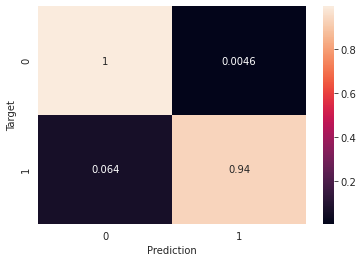

In [52]:
train_preds = predict_and_plot(X_train, train_targets, name = 'Training')

Accuracy:95.614035%


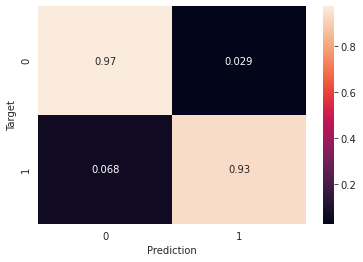

In [53]:
val_preds = predict_and_plot(X_val, val_targets, name = 'Validation')

Accuracy:96.491228%


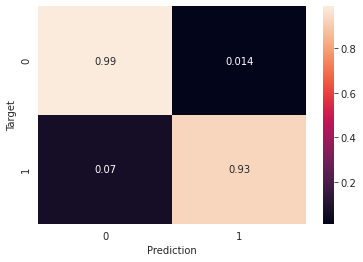

In [54]:
test_preds = predict_and_plot(X_test, test_targets, name ='Test')